# Série 3 : Fichiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercice 1
Le fichier $\color{red}{\text{la example.dat}}$ contient les données de magnitude en fonction de couleur.
 1. Lire les données du fichier:    

### avec $\color{blue}{\text{la fonction open}}$

In [ ]:
with open("./data/example.dat",'r') as f:
    col=[]
    mag = []
    next(f)  # for skip headers
    for line in f:
        column = line.split()
        col.append(float(column[0]))
        mag.append(float(column[1]))
col
mag
plt.scatter(col, mag)
plt.xlabel('Coleur')
plt.ylabel('magnitude')

### avec $\color{blue}{\text{la librerier Pandas}}$

In [ ]:
df=pd.read_csv("./data/example.dat",sep=' ', header=0).drop_duplicates()

2. Tracer la magnitude en fonction de couleur

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
plt.scatter(col,mag)
plt.scatter(df['color'],df['mag'])
#plt.savefig("fig")

# Exercice 2
Le fichier $\color{red}{\text{seeing.txt}}$ contient les données de seeing en fonction de temps (en terme de jourjulien).

   1. Lire les données du fichier en utilisant $\color{blue}{\text{la librerier Pandas}}$.

In [2]:
df=pd.read_csv("./data/seeing.txt",sep='|', names= ['jourjulien', 'seeing'], header = None).drop_duplicates()

2. Créer une fonction $\color{red}{\text{lissage}}$ qui débruite une courbe par une moyenne glissante sur 2P+1 points

In [3]:
def lissage(Lx,Ly,p):
        '''Fonction qui débruite une courbe par une moyenne glissante
        sur 2P+1 points'''
        Lxout=[]
        Lyout=[]
        Lxout = Lx[p: -p]
        for index in range(p, len(Ly)-p):
            average = np.mean(Ly[index-p : index+p+1])
            Lyout.append(average)
        return Lxout,Lyout

3. Tracer dans le méme figure le seeing (bruité et lissé) en fonction de jourjulien

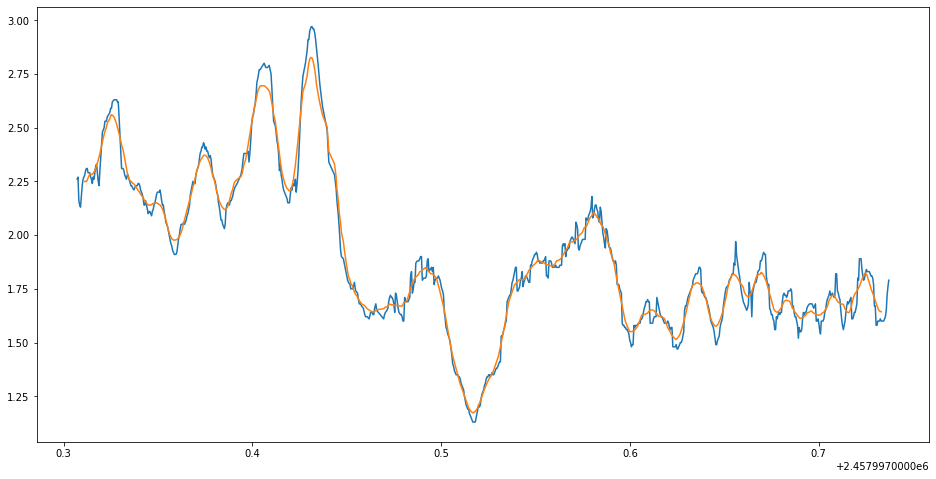

In [4]:
def plot():
    p = 9
    x, y = lissage(df.index, df['seeing'], p)
    index = np.array(x)
    seeing = np.array(y)
    jourjulien = np.array(df["jourjulien"][p:-p])
    fig, ax = plt.subplots()
    fig.set_size_inches(16,8)
    plt.plot(df["jourjulien"],df['seeing'])
    plt.plot(jourjulien,seeing)
#plt.savefig("fig")

plot()

<!--NAVIGATION-->
<  [Exercices](Serie_3.ipynb) | [Sommaire](Intro_Phyton_Master.ipynb) >